## Iris Flower Classification 


This notebook is dedicated to scrutinizing the machine learning algorithms employed in my web application. Its primary goal is to determine the most effective algorithm and assess its accuracy. Through a combination of exploratory data analysis and the application of various machine learning models, we aim to gain valuable insights into our dataset's characteristics and the performance of different algorithms.

Your feedback and insights are highly appreciated as we embark on this journey of optimizing our machine learning models.

### 1. About the DataSet

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

![img](assets/iris-machinelearning.png)

In [1]:
with open('assets/iris.names', 'r') as f:
    print(f.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### 2. Import Libraries and Dataset

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the iris dataset
iris_data = pd.read_csv('assets/iris.data', names=column_names)

# Display the first few rows of the dataset
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### 3. Quick Data Summary

#### 3.1 Check Missing Values

In [4]:
# resubale function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data) * 100)
    missing_value_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_count]
    print("Number of columns with missing values:", missing_value_count)

    if missing_value_count != 0:
        # print out column names with missing value percentage
        print("Missing Percentage (desceding)")
        print(missing_value_stats)
    else:
        print("No missing data!")

In [5]:
missing_value_describe(iris_data)

Number of columns with missing values: 0
No missing data!


**Well!!! We have no missing data**

In [6]:
# take a peek
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 3.2 Dimension of the dataset

In [7]:
# dimension 
print(f'The dimension: {iris_data.shape}')

The dimension: (150, 5)


We can see we have a dataset with 150 observations and each observation has 6 columns.

Four of the columns are numeric attributes we can use to train machine learning models and the last column is the label of a given flower.

#### 3.3 Statistical Summary (Current Status)

In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's interpret the above statistical description of our dataset:
- The description shows we have data with super low std (Standard Deviation)
    - the range of the SepalLengthCm is: **4.300000 - 7.900000**
    - the range of the SepalWidthCm is : **2.000000 - 4.400000**
    - the range of the PetalLengthCm is: **1.000000 - 6.900000**
    - the range of the PetalWidthCm is : **0.100000 - 2.500000**

#### 3.4 Distribution of each class

Since we are predicting the class of a given flower, let's examine what's the class distribution for this dataset

In [9]:
# class distribution
iris_data.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 4. Explore Data with Visualization

#### 4.1 Let's visualize the distribution

c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


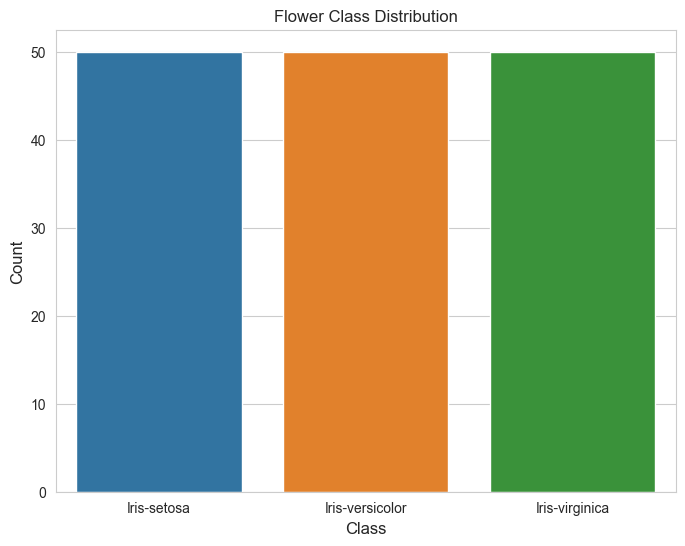

In [10]:
sns.set_style("whitegrid")

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=iris_data)
plt.title("Flower Class Distribution")
plt.xlabel('Class', size=12)
plt.ylabel('Count', size=12)
plt.show()

From the above visualization and the summary, we can see each class has equal distribution in the dataset. It's very "Ideal" in machine learning project.

#### 4.2 Box and Whisker Plot

We will use it see how the values are distributed in each attribute

c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

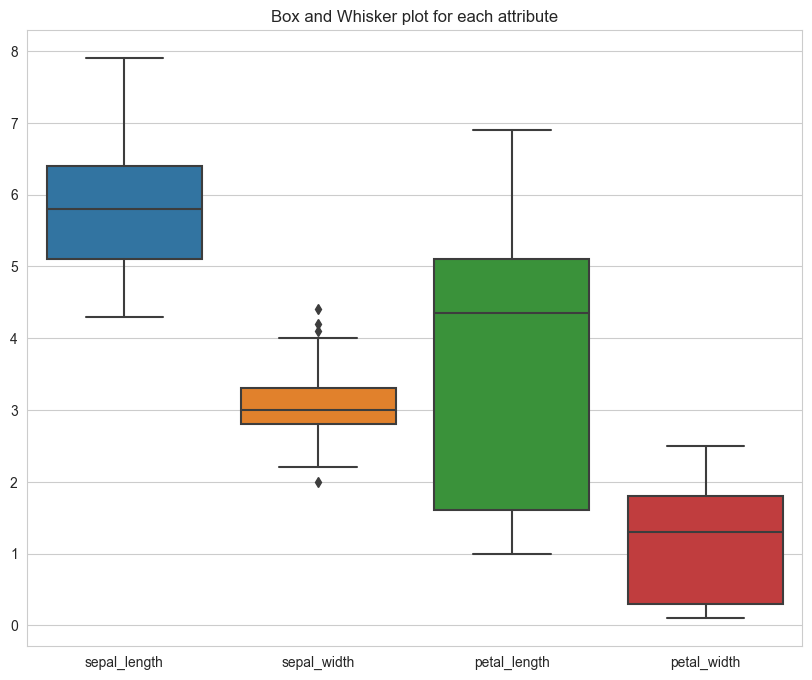

In [11]:
# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_data, orient="v")
plt.title("Box and Whisker plot for each attribute")
plt.show()

#### 4.3 Histogram

Histogram is an very important tool to help visualize the dataset's value distribution

c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

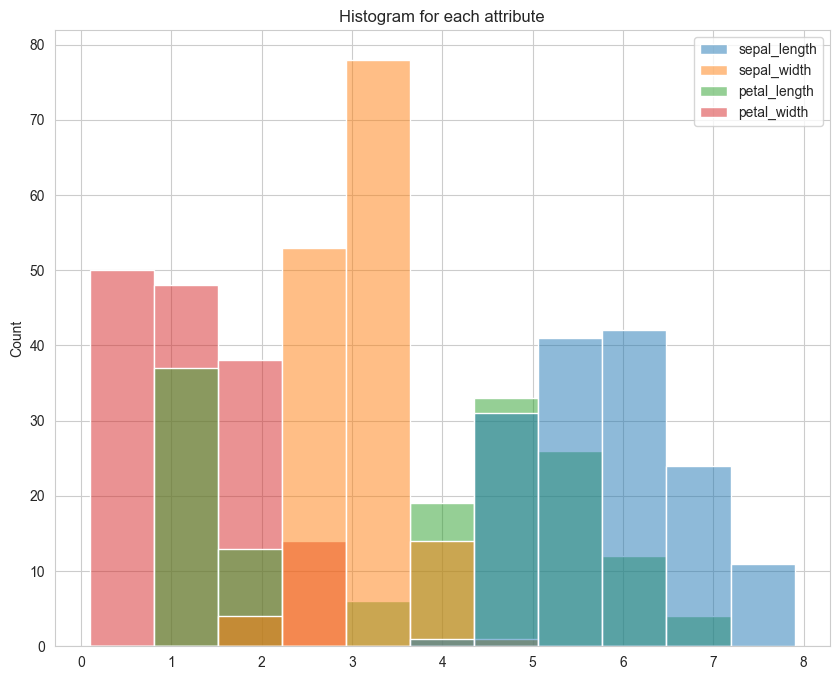

In [12]:
# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.histplot(data=iris_data, kde=False)
plt.title("Histogram for each attribute")
plt.show()

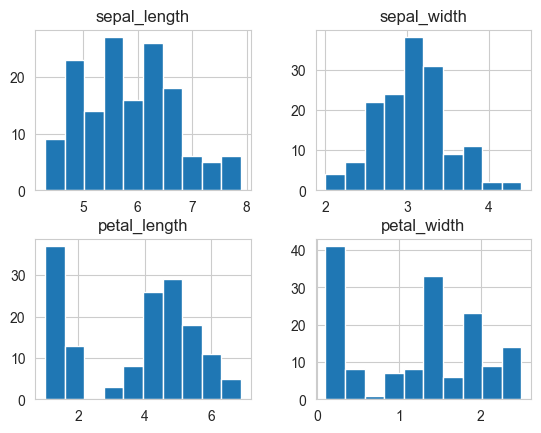

In [13]:
iris_data.hist()
plt.show()

From the above Box and Whisker plot and histogram, they show 2 of the attributes has normal distribution. This is assimption for many machine learning algorithm. We can utilize the distribution to model our data.

#### 4.4 Multivariate scatter plot:

Multivariate scatter plot helps us to visualize the pair-wise relationship in our dataset.

c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

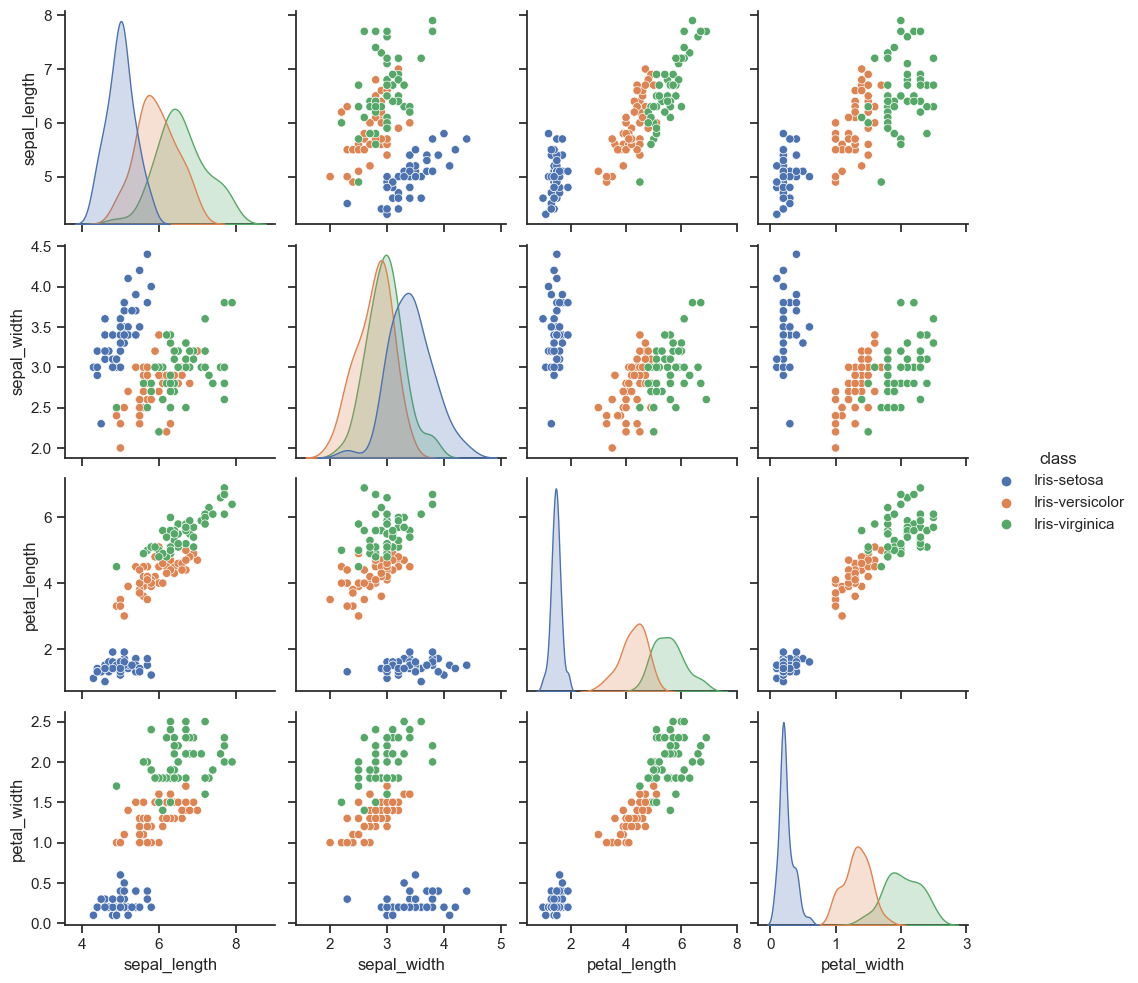

In [14]:
sns.set(style="ticks")
sns.pairplot(iris_data, hue='class')

In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pair-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm.

### 5. Data Modeling

**Classification Problem:** Our goal is to predict the follow "Species" with given 4 features: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, and `PetalWidthCm`.

#### 5.1 Train-Test Split

We will use Sklearn to split arrays or matrices into random train and test subsets for training and testing machine learning model.

Our X will be the feature of the flowers and Y will be the label of the flowers

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# we will split data to 80% training data and 20% testing data
# with random seed of 10
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {y_train.shape}")
print(f"Y Test Shape: {y_test.shape}")

X Train Shape: (120, 4)
X Test Shape: (30, 4)
Y Train Shape: (120,)
Y Test Shape: (30,)


#### 5.2 Models Building

Let's build multiple machine learning models to evaluate how they will perform on our classification problem.

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training the models and evaluate with 10-fold cross validation

In [37]:
# models
models = []

# linear model
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(("CART", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVC", SVC(gamma="auto")))

In [38]:
print(models)

[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('CART', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier()), ('GNB', GaussianNB()), ('SVC', SVC(gamma='auto'))]


In [52]:
print("Model Accuracy: ")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evaluate model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    res = f"{name}: accuracy={cv_results.mean():.4f} std={cv_results.std():.4f}"
    print(res)

Model Accuracy: 
LR: accuracy=0.9583 std=0.0559
LDA: accuracy=0.9750 std=0.0382
CART: accuracy=0.9500 std=0.0764
KNN: accuracy=0.9833 std=0.0333
GNB: accuracy=0.9667 std=0.0408
SVC: accuracy=0.9917 std=0.0250


Let's visualize the training with Box Plot

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Model Accuracy: ")
all_results = []  # List to store all accuracy results

for name, model in models:
    # 10 fold cross validation to evaluate model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    res = f"{name}: accuracy={cv_results.mean():.4f} std={cv_results.std():.4f}"
    print(res)
    # Store the accuracy results
    for result in cv_results:
        all_results.append({'Model': name, 'Accuracy': result})

# Create a DataFrame from the accuracy results
df_accuracy = pd.DataFrame(all_results)

Model Accuracy: 
LR: accuracy=0.9583 std=0.0559
LDA: accuracy=0.9750 std=0.0382
CART: accuracy=0.9500 std=0.0764
KNN: accuracy=0.9833 std=0.0333
GNB: accuracy=0.9667 std=0.0408
SVC: accuracy=0.9917 std=0.0250


c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cW\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


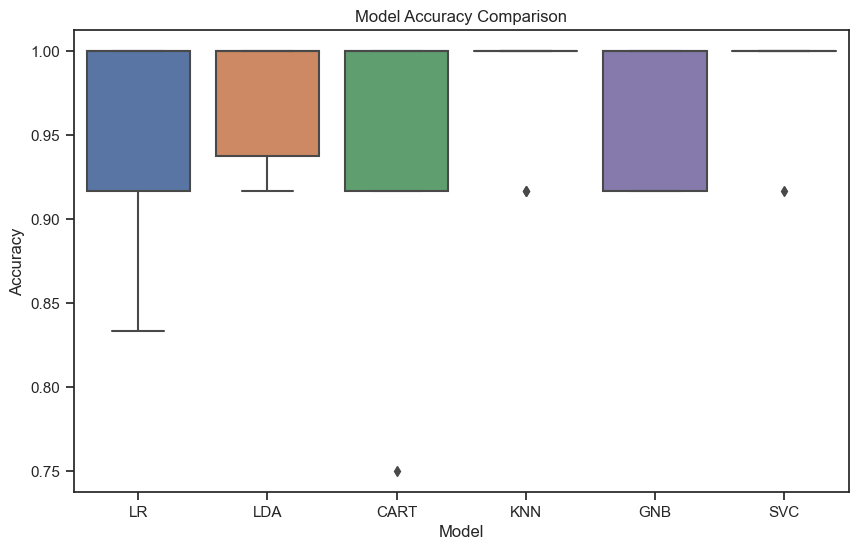

In [68]:
# Create boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.boxplot(x='Model', y='Accuracy', data=df_accuracy)
ax.set_title("Model Accuracy Comparison")
plt.show()


Test the KNN, GNP, and SVC models with test data and output their accuracy with confusion matrix together for selecting model

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVC", SVC(gamma="auto")))

In [75]:
def test_model(model):
    model.fit(X_train, y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [76]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei

The highest testing accuracy is 0.93 from Support Vector Classifier. <br>

The SVC's confustion matrix has the highest diagonal values indicated that SVC predicted the class type better than the other 2 models. <br>

From above confusion matrix and classification report, the SVC model is the best model for our classification problem.

### Conclusion:
This kernel described and explored the classic Iris dataset with data visualizations. And we also experimented with 4 machine learning models: 2 linear and 4 non-linear models.
I examined the training results with 10-fold cross validation and chose SVC as the best model with testing confusion matrix output and classification report.

In [2]:
import joblib